In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 
import tensorflow as tf


In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
#load save model
model = tf.keras.models.load_model('./models/object_detection.h5')
print('model loaded secufully')

model loaded secufully


In [4]:
path = './test_images/5.jpg'
image = load_img(path)
image = np.array(image,dtype=np.uint8) #8 bit array
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0 #convert in to array and get normalize output

In [5]:
#print size of orginal images 
h,w,d = image.shape
print('height of images=',h)
print('width of images=',w)

height of images= 1689
width of images= 1200


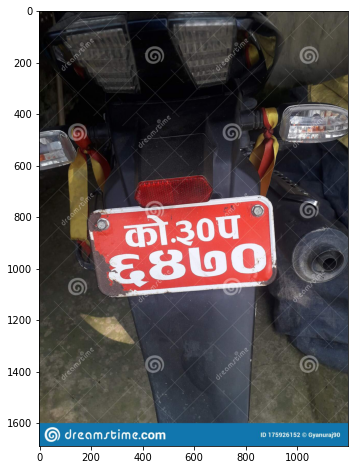

In [6]:
plt.figure(figsize=(10,8)) 
plt.imshow(image)
plt.show()

In [7]:
image_arr_224.shape

(224, 224, 3)

In [8]:
test_arr = image_arr_224.reshape(1,224,224,3)#1 indiciates number of images
test_arr.shape

(1, 224, 224, 3)

In [9]:
 # make prediction
coords = model.predict(test_arr)
    

In [10]:
coords

array([[0.21579424, 0.7783092 , 0.40688005, 0.72110784]], dtype=float32)

In [11]:
#denormalize 
denorm = np.array([w,w,h,h])
coords = coords*denorm
coords

array([[ 258.95308256,  933.97107124,  687.22040597, 1217.95114267]])

In [12]:
coords = coords.astype(np.int32)
coords

array([[ 258,  933,  687, 1217]])

(258, 687) (933, 1217)


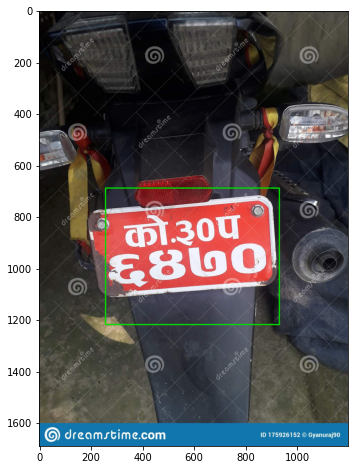

In [13]:
#drawing bounding box
xmin,xmax,ymin,ymax = coords[0]
pt1 = (xmin,ymin)
pt2 = (xmax,ymax)
print(pt1,pt2)
cv2.rectangle(image,pt1,pt2,(0,224,0),3)


plt.figure(figsize=(8,8)) 
plt.imshow(image)
plt.show()


In [14]:
#create_pipeline
def object_detection(path):
    image = load_img(path)
    image = np.array(image,dtype=np.uint8) #8 bit array
    image1 = load_img(path,target_size=(224,224))
    #pre-processing
    image_arr_224 = img_to_array(image1)/255.0 #convert in to array and get normalize output
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)#1 indiciates number of images
    test_arr.shape
    coords = model.predict(test_arr)
    #denormalize 
    denorm = np.array([w,w,h,h])
    coords = coords*denorm
    coords = coords.astype(np.int32)
    #bounding box
    #drawing bounding box
    xmin,xmax,ymin,ymax = coords[0]
    pt1 = (xmin,ymin)
    pt2 = (xmax,ymax)
    print(pt1,pt2)
    cv2.rectangle(image,pt1,pt2,(0,224,0),3)
    return image,coords

(258, 687) (933, 1217)


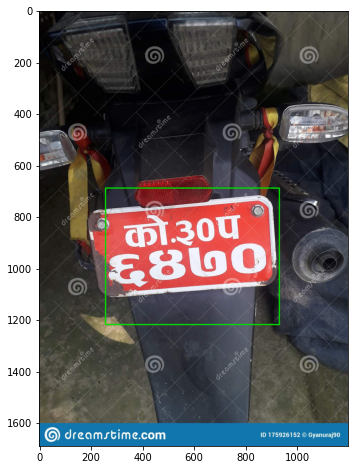

In [15]:
path = './test_images/5.jpg'
image,cods = object_detection(path)
plt.figure(figsize=(8,8)) 
plt.imshow(image)
plt.show()


# Optical character Regonition

In [16]:
import pytesseract as pt

(258, 687) (933, 1217)


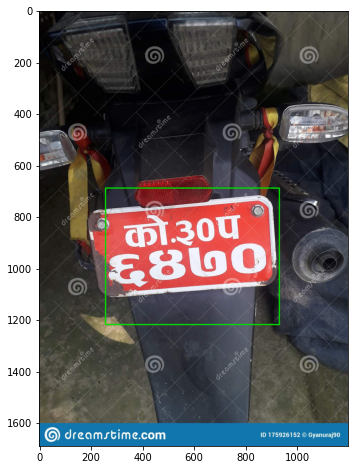

In [17]:
path = './test_images/5.jpg'
image,cods = object_detection(path)
plt.figure(figsize=(8,8)) 
plt.imshow(image)
plt.show()


In [18]:
img = np.array(load_img(path))
xmin ,xmax,ymin,ymax,cods[0]
roi = img[ymin:ymax,xmin:xmax]

<function matplotlib.pyplot.show(close=None, block=None)>

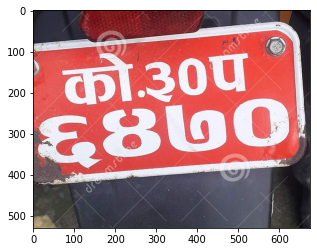

In [19]:
plt.imshow(roi)
plt.show

In [25]:
# extract text from image
text = pt.image_to_string(roi)
print(text)

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.